In [1]:
# create umap embeddings and use hdbscan to cluster

import os
import sys
import numpy as np
import pandas as pd
import umap
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


/Users/yunchaewon/Library/Caches/pypoetry/virtualenvs/css-g9_xBtzo-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('data/css_topic_embeddings.csv')
# drop if year is not numeric
df = df[df['Year'].str.isnumeric()]

# Standardize the embeddings
scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(np.array(df['embedding'].apply(eval).tolist()))

# Optional: Use PCA to reduce noise before UMAP
pca = PCA(n_components=50)
pca_embeddings = pca.fit_transform(scaled_embeddings)

# Create UMAP embeddings
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(pca_embeddings)

# Add the UMAP embeddings to the dataframe
df['embedding_2d_x'] = embedding_2d[:, 0]
df['embedding_2d_y'] = embedding_2d[:, 1]


/Users/yunchaewon/Library/Caches/pypoetry/virtualenvs/css-g9_xBtzo-py3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/yunchaewon/Library/Caches/pypoetry/virtualenvs/css-g9_xBtzo-py3.10/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


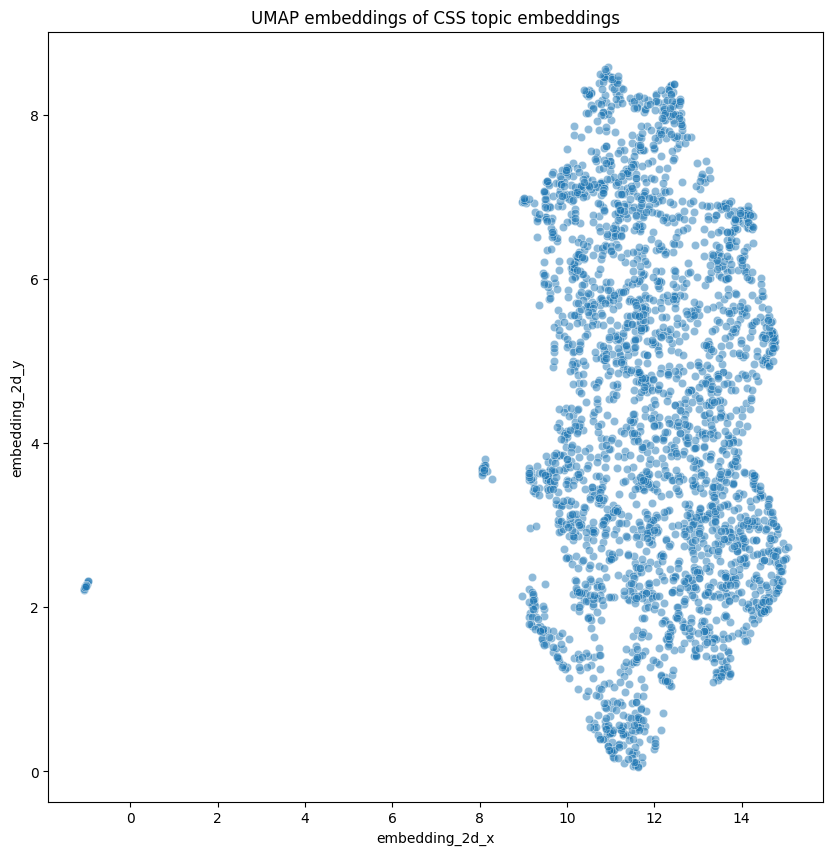

In [3]:

# Visualize the UMAP embeddings
plt.figure(figsize=(10, 10))
sns.scatterplot(x='embedding_2d_x', y='embedding_2d_y', data=df, alpha=0.5)
plt.title('UMAP embeddings of CSS topic embeddings')
plt.show()


/Users/yunchaewon/Library/Caches/pypoetry/virtualenvs/css-g9_xBtzo-py3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/yunchaewon/Library/Caches/pypoetry/virtualenvs/css-g9_xBtzo-py3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


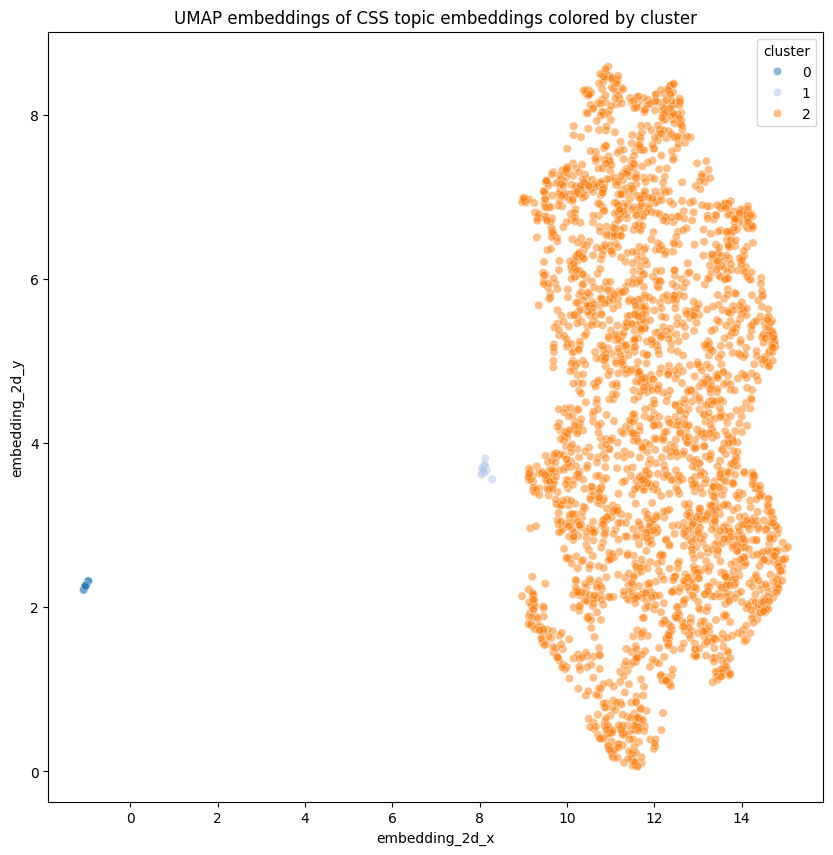

cluster
2    2707
1      21
0      18
Name: count, dtype: int64


In [8]:

# Adjust HDBSCAN parameters for better clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, cluster_selection_epsilon=0.1)
df['cluster'] = clusterer.fit_predict(embedding_2d)

# Visualize the clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='embedding_2d_x', y='embedding_2d_y', data=df, hue='cluster', palette='tab20', alpha=0.5)
plt.title('UMAP embeddings of CSS topic embeddings colored by cluster')
plt.show()

# Evaluate clustering results
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)

In [9]:
# Standardize the embeddings
scaler = StandardScaler()
#scaled_embeddings = scaler.fit_transform(df['embedding'].tolist())

# Create UMAP embeddings
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(scaled_embeddings)

# Add the UMAP embeddings to the dataframe
df['embedding_2d_x'] = embedding_2d[:, 0]
df['embedding_2d_y'] = embedding_2d[:, 1]

print(df[['embedding_2d_x', 'embedding_2d_y']].head())

/Users/yunchaewon/Library/Caches/pypoetry/virtualenvs/css-g9_xBtzo-py3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/yunchaewon/Library/Caches/pypoetry/virtualenvs/css-g9_xBtzo-py3.10/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


   embedding_2d_x  embedding_2d_y
0       11.306501        2.873106
1        9.296700        1.232854
2        6.990995        2.860820
3        8.469119        5.553130
4        8.519788        2.053866


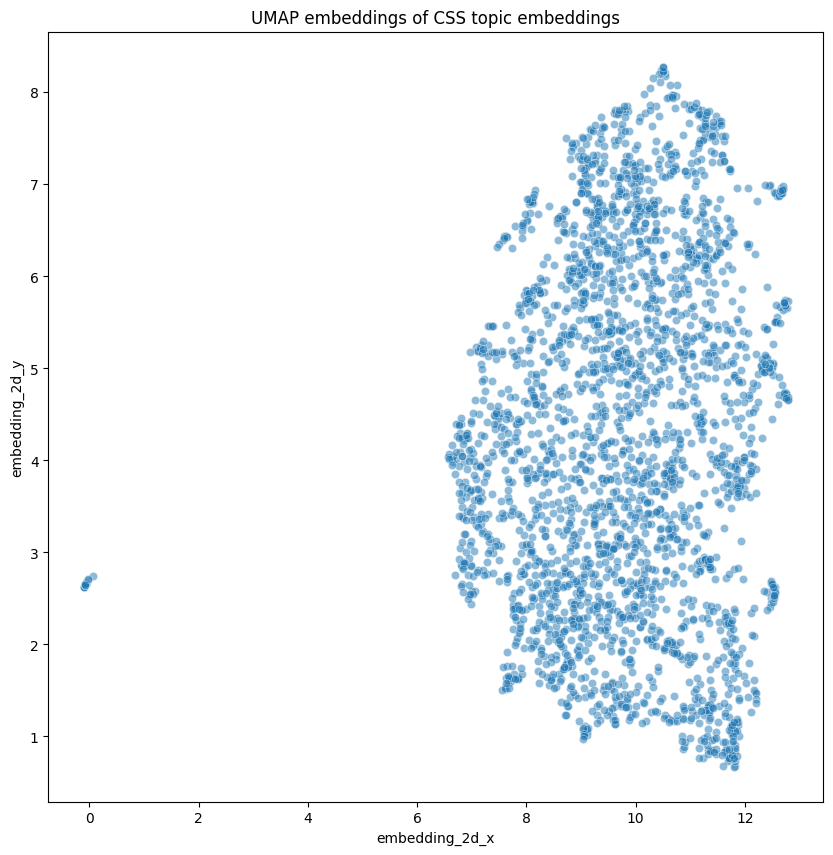

In [10]:
# visualize the embeddings
plt.figure(figsize=(10, 10))
sns.scatterplot(x='embedding_2d_x', y='embedding_2d_y', data=df, alpha=0.5)
plt.title('UMAP embeddings of CSS topic embeddings')
plt.show()

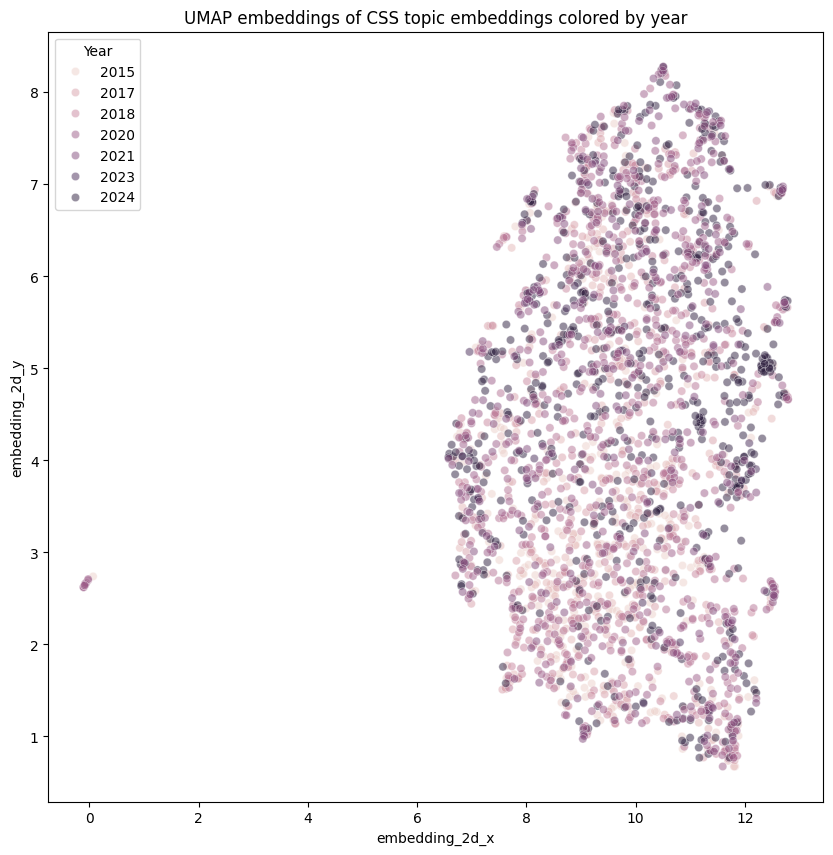

In [11]:
# color each node by its year

df['Year'] = df['Year'].astype(int)
plt.figure(figsize=(10, 10)) 
sns.scatterplot(x='embedding_2d_x', y='embedding_2d_y', data=df, hue='Year', alpha=0.5)
plt.title('UMAP embeddings of CSS topic embeddings colored by year')    
plt.show()


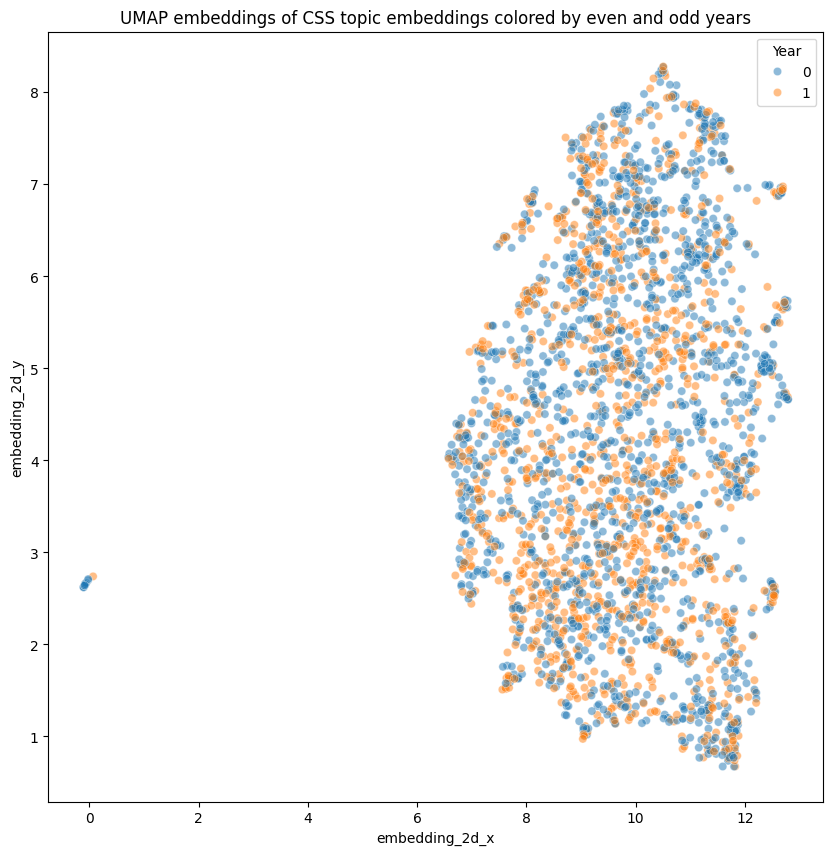

In [12]:
# color even-number years as the same color and odd-number years as the same color
df['Year'] = df['Year'] % 2
plt.figure(figsize=(10, 10))
sns.scatterplot(x='embedding_2d_x', y='embedding_2d_y', data=df, hue='Year', alpha=0.5)
plt.title('UMAP embeddings of CSS topic embeddings colored by even and odd years')
plt.show()


/Users/yunchaewon/Library/Caches/pypoetry/virtualenvs/css-g9_xBtzo-py3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/yunchaewon/Library/Caches/pypoetry/virtualenvs/css-g9_xBtzo-py3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


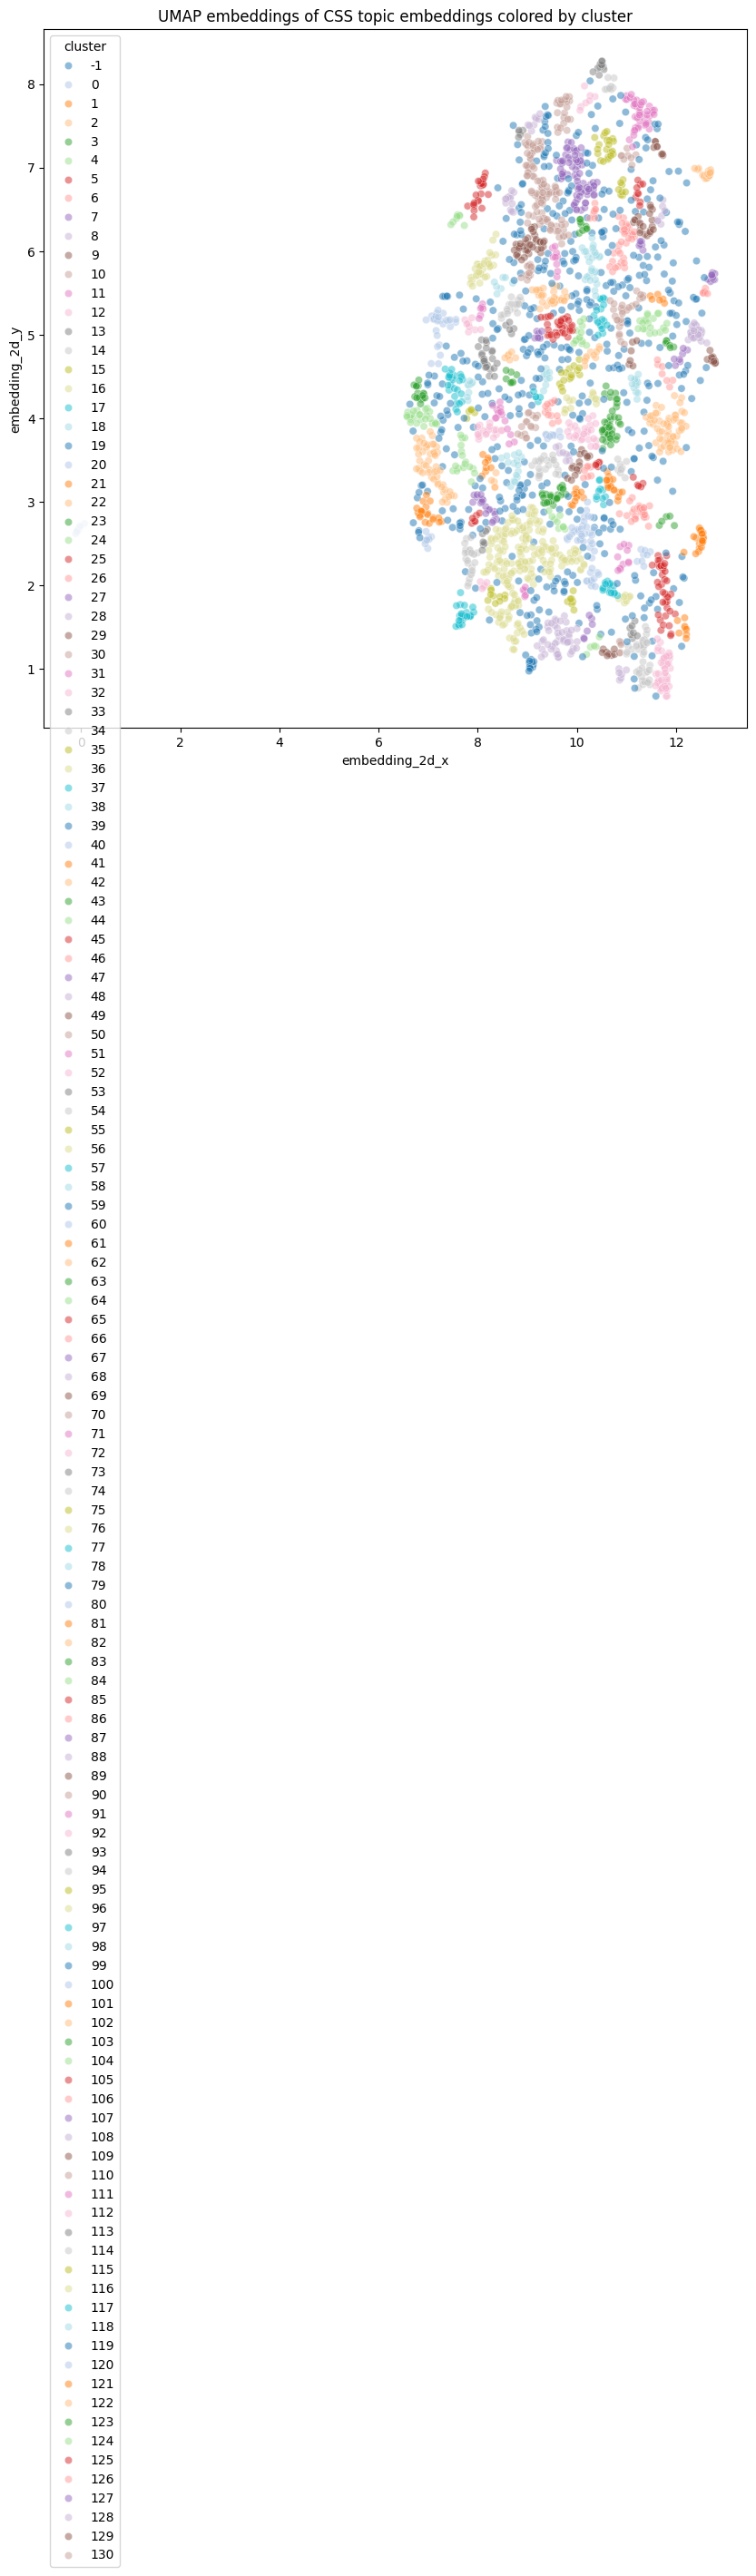

cluster
-1      453
 116    184
 130     94
 127     73
 42      60
       ... 
 93       5
 73       5
 3        5
 91       5
 55       5
Name: count, Length: 132, dtype: int64


In [14]:

# Adjust HDBSCAN parameters for better clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, cluster_selection_epsilon=0.1)
df['cluster'] = clusterer.fit_predict(embedding_2d)

# Visualize the clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='embedding_2d_x', y='embedding_2d_y', data=df, hue='cluster', palette='tab20', alpha=0.5)
plt.title('UMAP embeddings of CSS topic embeddings colored by cluster')
plt.show()

# Evaluate clustering results
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)

/Users/yunchaewon/Library/Caches/pypoetry/virtualenvs/css-g9_xBtzo-py3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/yunchaewon/Library/Caches/pypoetry/virtualenvs/css-g9_xBtzo-py3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


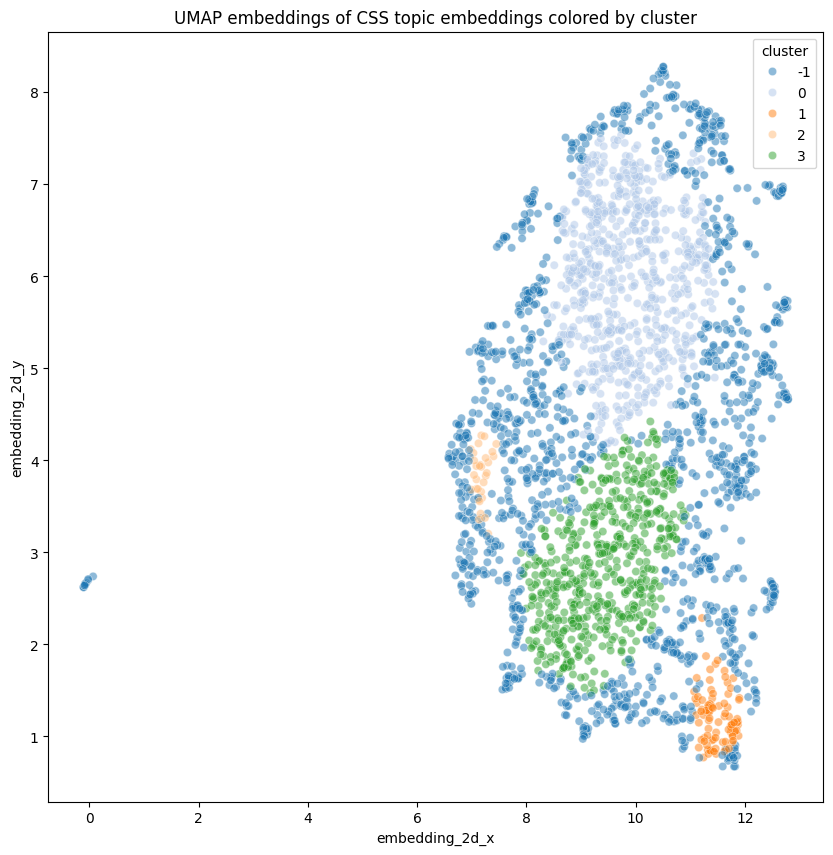

cluster
-1    1363
 0     699
 3     557
 1      95
 2      32
Name: count, dtype: int64


In [ ]:

# Adjust HDBSCAN parameters for better clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=100, cluster_selection_epsilon=0.1)
df['cluster'] = clusterer.fit_predict(embedding_2d)

# Visualize the clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='embedding_2d_x', y='embedding_2d_y', data=df, hue='cluster', palette='tab20', alpha=0.5)
plt.title('UMAP embeddings of CSS topic embeddings colored by cluster')
plt.show()

# Evaluate clustering results
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)